# Gradient Descent

We will code up a gradient descent algorithm in python to estimte the paramenters of an equation of fitting a line for linear regression

## Bootstrap The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sythesize the Data

In [2]:
np.random.seed(42)

In [3]:
X = np.random.randint(0, 100, 100) # X data

In [4]:
y = 50 + (2 * X) # y data

In [14]:
X, y

(array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
        87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
        59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
         3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
        80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
        99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23]),
 array([152, 234,  78, 192, 170,  90, 214, 222, 198, 198, 224, 248,  96,
         54,  92, 154,  52, 224, 108, 124,  52, 176, 168,  90, 114, 200,
        164,  92, 226, 146, 230, 166, 132, 232, 168, 208,  78, 172, 172,
        142, 172, 150, 158, 176,  54, 150,  62,  90, 194, 126,  84,  56,
        226, 168,  76,  66, 228, 154,  52, 216, 232, 168, 190, 136,  64,
        142, 118, 204, 210, 120, 148,  56,  52,  60, 156,  56, 156, 234,
        174,  84, 228, 136, 116, 196, 172, 248,  76, 238, 144,  78, 192,
        204, 222, 172, 128, 218, 208, 2

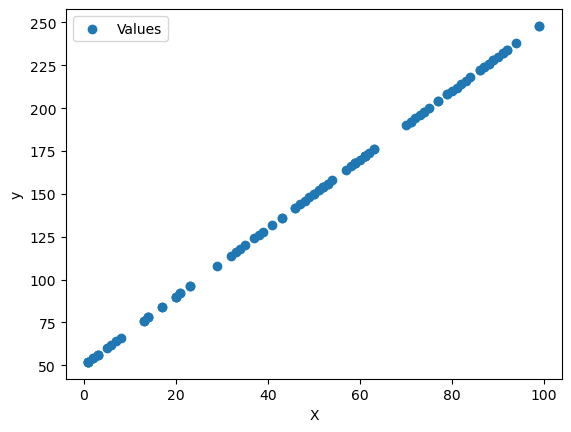

In [18]:
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(X, y, label='Values')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()

## Code Up The Gradient Descent

In [70]:
# gradient descent class
class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100, random_state=42, verbose=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
    
    def fit(self, X, y):
        # set some random values for slope and intercept
        random_generator = np.random.RandomState(self.random_state)
        self.slope_ = random_generator.random()
        self.intercept_ = np.float_(0)
        n = len(X)
        self.losses_ = []
        
        # iterate over epoch times and find the gradient
        for i in range(self.epochs):
            y_predicted = self.intercept_ + self.slope_ * X
            errors = (y - y_predicted)
            loss = sum(errors ** 2)/n
            slope_delta = (-2/n) * sum(X * errors)
            intercept_delta = (-2/n) * sum(errors)
            
            self.slope_ = self.slope_ - (self.learning_rate * slope_delta)
            self.intercept_ = self.intercept_ - (self.learning_rate * intercept_delta)
            self.losses_.append(loss)
            
            if self.verbose == True:
                print('Epoch: {}, Slope: {}, Intercept: {}, Loss: {}'.format(i, self.slope_, self.intercept_, loss))
            else:
                if i % 1000 == 0:
                    print(errors)
                    print(sum(X * errors))
                    print(sum(errors))
                    print('Epoch: {}, Slope: {}, Intercept: {}, Loss: {}'.format(i, self.slope_, self.intercept_, loss))

In [71]:
gd1 = GradientDescent(learning_rate=0.0002, epochs=60001, verbose=False)

In [72]:
gd1.fit(X, y)

[132.89845394 199.54230907  72.75643834 165.40765156 147.52759287
  82.50919762 183.28771025 189.78954978 170.28403121 170.28403121
 191.41500966 210.92052823  87.38557727  53.25091976  84.1346575
 134.52391382  51.62545988 191.41500966  97.13833655 110.1420156
  51.62545988 152.40397251 145.90213299  82.50919762 102.0147162
 171.90949109 142.65121323  84.1346575  193.04046954 128.0220743
 196.2913893  144.27667311 116.64385513 197.91684918 145.90213299
 178.41133061  72.75643834 149.15305275 149.15305275 124.77115453
 149.15305275 131.27299406 137.77483358 152.40397251  53.25091976
 131.27299406  59.75275929  82.50919762 167.03311144 111.76747548
  77.63281798  54.87637964 193.04046954 145.90213299  71.13097845
  63.00367905 194.66592942 134.52391382  51.62545988 184.91317014
 197.91684918 145.90213299 163.78219168 119.89477489  61.37821917
 124.77115453 105.26563596 175.16041085 180.03679049 106.89109584
 129.64753418  54.87637964  51.62545988  58.12729941 136.1493737
  54.87637964 1

In [61]:
(gd1.intercept_, gd1.slope_, gd1.losses_[-1])

(49.87977006909466, 2.0017812787847915, 0.003632964199271855)

In [62]:
y_predicted = gd1.intercept_ + gd1.slope_ * X

Text(0.5, 1.0, 'Losses vs epochs')

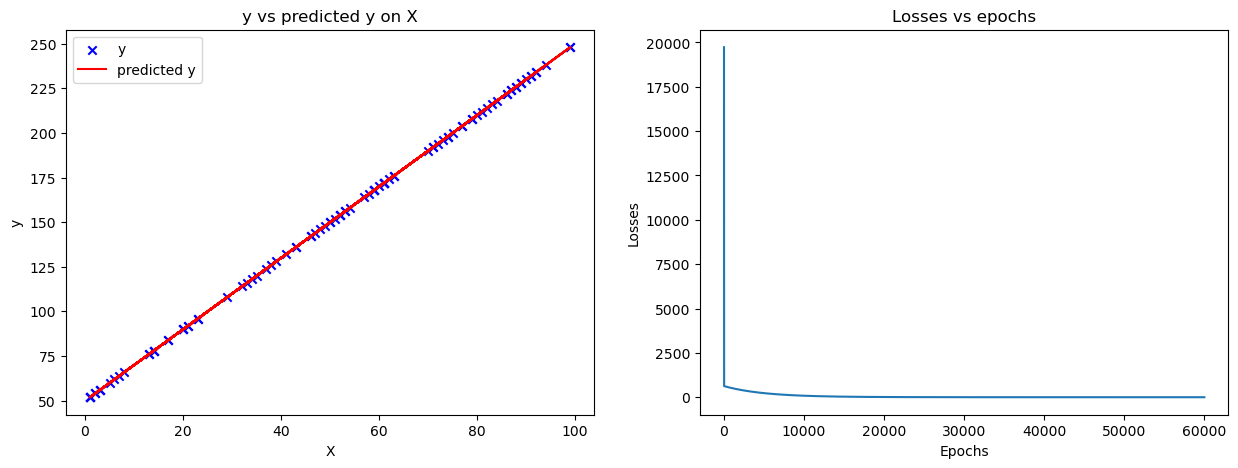

In [63]:
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 5))
ax1[0].scatter(X, y, marker='x', color='blue', label='y')
ax1[0].plot(X, y_predicted, color='red', label='predicted y')
ax1[0].set_xlabel('X')
ax1[0].set_ylabel('y')
ax1[0].set_title('y vs predicted y on X')
ax1[0].legend()
ax1[1].plot(range(1, len(gd1.losses_) + 1), gd1.losses_)
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Losses')
ax1[1].set_title('Losses vs epochs')